In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as p
import networkx as nx
import matplotlib.pyplot as plt
from ActorNetwork import ActorNetwork

In [2]:
file_path = 'data/pkl/an.pkl' # Replace with your actual file path

# Open the file in read-binary mode ('rb')
with open(file_path, 'rb') as file:
    # Use pickle.load() to deserialize the data
    data = p.load(file)

In [3]:
data

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
def compute_depths(parent, root):
    depth = {root: 0}

    def dfs(u):
        for v, p in parent.items():
            if p == u:
                depth[v] = depth[u] + 1
                dfs(v)

    dfs(root)
    return depth


def visualize_dfs_tree(parent, root):
    T = nx.DiGraph()

    # build DFS tree from parent pointers
    for node, par in parent.items():
        if par is not None:
            T.add_edge(par, node)

    depth = compute_depths(parent, root)

    # manual tree layout
    pos = {}
    x = 0
    for node in sorted(depth, key=lambda v: depth[v]):
        pos[node] = (x, -depth[node])
        x += 1

    plt.figure(figsize=(16, 6))
    nx.draw(
        T,
        pos,
        with_labels=False,
        node_size=700,
        font_size=8,
        arrows=False
    )
    plt.title(f"DFS Tree rooted at {root}")
    plt.show()


0.1456739902496338


/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


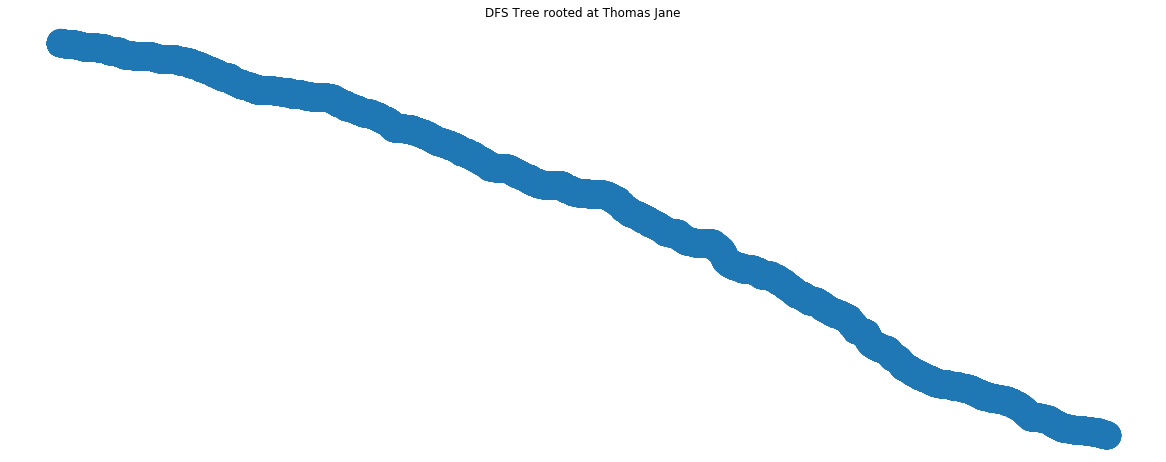

In [5]:
an=data
parent = an.DFS("Thomas Jane")
visualize_dfs_tree(parent, "Thomas Jane")

In [9]:
s=0
res = []
for key,val in an.costars.items():
    
    s+=len(val)
    res.append(len(val))

    
    
    

In [7]:
s

2863375

In [8]:
s/len(an.costars)

120.01236430697011

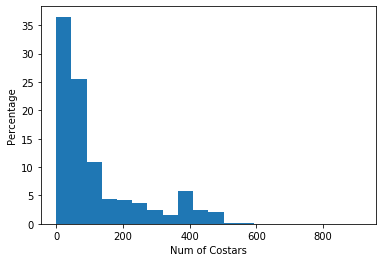

In [15]:
import numpy as np
import matplotlib.pyplot as plt

data = res

weights = np.ones(len(data)) / len(data) * 100

plt.hist(data, bins=20, weights=weights)
plt.xlabel("Num of Costars")
plt.ylabel("Percentage")
plt.show()



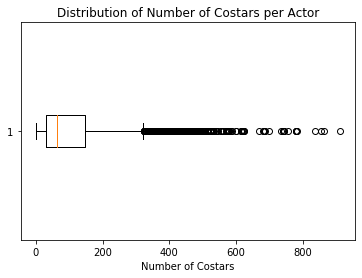

In [17]:
import matplotlib.pyplot as plt

data = res

plt.boxplot(data, vert=False, showfliers=True)
plt.xlabel("Number of Costars")
plt.title("Distribution of Number of Costars per Actor")
plt.show()



In [27]:
class Vis:
    def __init__(self,an):
        self.an = an
        self.res=self._degree()
    def _degree(self):
        
        res = []
        for key,val in self.an.costars.items():
            res.append(len(val))

        return res

    def hist(self):
        data = self.res

        weights = np.ones(len(data)) / len(data) * 100
        
        plt.hist(data, bins=20, weights=weights)
        plt.xlabel("Num of Costars")
        plt.ylabel("Percentage")
        plt.show()

    def boxWhisker(self):
        data = self.res

        plt.boxplot(data, vert=False, showfliers=True)
        plt.xlabel("Number of Costars")
        plt.title("Distribution of Number of Costars per Actor")
        plt.show()
            

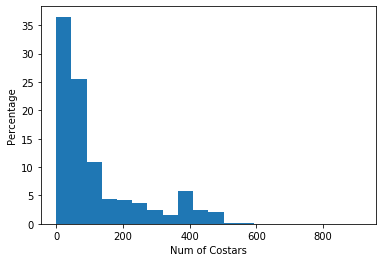

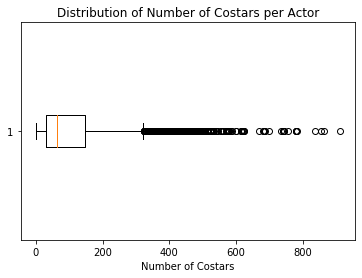

In [29]:
v = Vis(an)

v.res
v.hist()
v.boxWhisker()